This is Section 1 of Coursework 2
-----------------------------------------------------------
The data required to run this notebook (inlcluding the notebook itself) is shared on Moodle-->coursework. 
The data is saved in h5 format with the file
name "df_train_FDIC_defaults_1Y.h5". This dataset is from FDIC. See the following link to know more about FDIC:

https://en.wikipedia.org/wiki/Federal_Deposit_Insurance_Corporation

You need to save this file on your PC,and then load it using an approprite file path, see the loading data section below.
You only need to fill out the parts that you are asked to do so. You can find these parts by looking
for word "Exercise" using Ctrl+F
There are 6 excercises for this section.
You may need to install and load certain packages in order for the code to run. 
Some packages are loaded below. 

Note that this notebook may contain other information which is just for informative purposes, but in order to 
do the exercises, you will need to understand the whole document (or at least most of it). You can try to explore this file.

The approximated number of lines requierd for coding for each exercise is provided to you. You should not
feel guilty if your lines of codes are longer.

Marks for each exercise are shown in brakcets; note that these marks are provisional and they might be changed.
-------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import svm

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import h5py
data = pd.read_hdf('./data/df_train_FDIC_defaults_1Y.h5')
data.head()

,,Financial Institution Name,Institution Name,total_assets,defaulter,Failure / Assistance,log_TA,NI_to_TA,Equity_to_TA,NPL_to_TL,REO_to_TA,...,loss_provision_to_TL_plus_1Q,ROA_plus_1Q,NIM_plus_1Q,assets_growth_plus_1Q,default_within_1Y,Failure,max_total_assets,num_records,non_defaulter,const
IDRSSD,date,,,,,,,,,,,,,,,,,,,,,
904957,2008-03-31,COLORADO NATIONAL BANK,COLORADO NATIONAL BANK,142138.0,1.0,FAILURE,-0.048734,-6.505183,-0.759562,0.880756,-0.162301,...,0.004823,-0.367905,-0.840312,-0.582232,1.0,1.0,142138.0,31.0,0.0,1
202907,2011-06-30,"COMMUNITY BANK, NATIONAL ASSOCIATION",NaN,6364903.0,0.0,NaN,2.754852,0.143005,0.249275,-0.405931,-0.327268,...,-0.003057,0.205816,-0.140365,0.003962,0.0,NaN,8494486.0,60.0,1.0,1
652874,2012-12-31,"NEXBANK, SSB",NaN,784781.0,0.0,NaN,1.211269,0.229021,-0.301031,-0.750449,-0.304600,...,-0.003506,0.470935,-0.799310,0.284815,0.0,NaN,2698563.0,60.0,1.0,1
9115,2003-03-31,COMMERCE BANK/SHORE NATIONAL ASSOCIATION,NaN,2173481.0,0.0,NaN,1.962490,0.253469,-0.922810,-0.752942,-0.374868,...,-0.002819,0.225454,-0.324276,1.091618,0.0,NaN,2697759.0,12.0,1.0,1
3344611,2012-06-30,"BANK OF AMERICA RHODE ISLAND, NATIONAL ASSOCIA...",NaN,19405460.0,1.0,NaN,3.576923,0.103615,0.088508,2.380231,-0.121243,...,0.001903,0.101099,-0.791229,-0.408817,0.0,NaN,39211041.0,31.0,0.0,1


In [3]:
# Set of features
spec = ['log_TA','NI_to_TA', 'Equity_to_TA', 'NPL_to_TL', 'REO_to_TA', 
              'ALLL_to_TL', 'core_deposits_to_TA', 'brokered_deposits_to_TA', 
              'liquid_assets_to_TA', 'loss_provision_to_TL', 'NIM', 'assets_growth']

mecv = ['term_spread',
                    'stock_mkt_growth',
                    'real_gdp_growth',
                    'unemployment_rate_change',
                    'treasury_yield_3m',
                    'bbb_spread',
                    'bbb_spread_change']

In [4]:
#This is a small size dataset
data.shape

(641, 44)

In [5]:
data_features = pd.concat([data[mecv],data[spec]],axis=1)
#y=data['defaulter']
y = data['default_within_1Y']

In [6]:
#Standardizing
X = (data_features-np.mean(data_features))/np.std(data_features)

In [7]:
#Choosing the random seed
seed = 40

In [8]:
#Useing train_test_split function from scikit-learn to split the dataset into 60% training,
#20% cross validation, and 20% testing


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.6, random_state=seed)
x_test, x_cv, y_test, y_cv = train_test_split( x_test, y_test, test_size=0.5, random_state=seed)



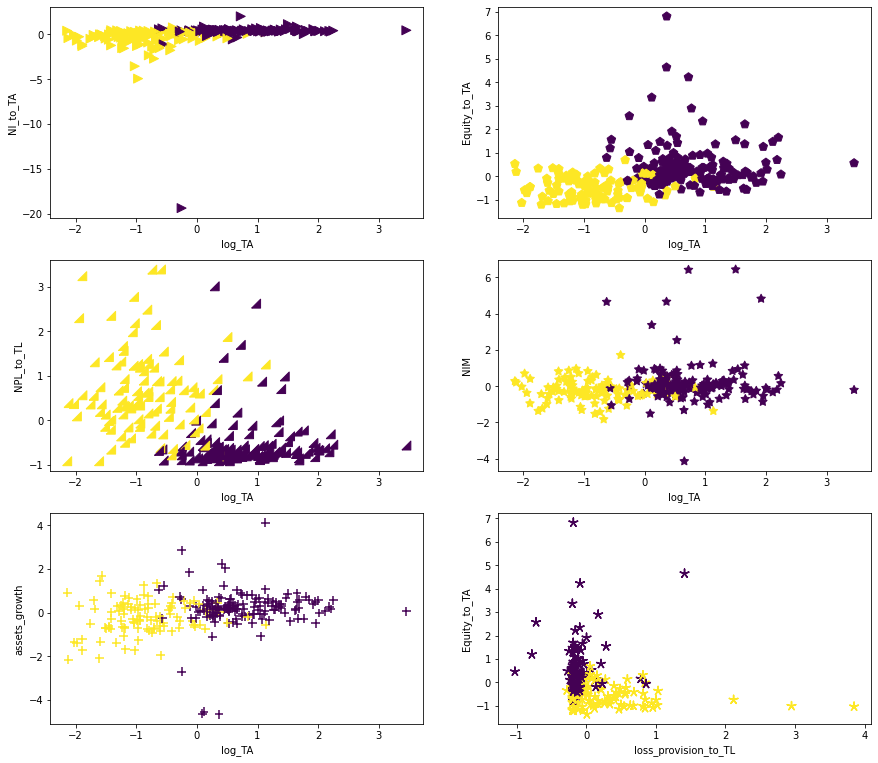

In [9]:
# Some scatter plots

plt.subplots_adjust(left=0.1, bottom=0.51, top=3, right=2)

plt.subplot(321)
plt.scatter(x_train['log_TA'], x_train['NI_to_TA'], s=80, c=y_train, marker=">")

plt.xlabel("log_TA")
plt.ylabel("NI_to_TA")


plt.subplot(322)
plt.scatter(x_train['log_TA'], x_train['Equity_to_TA'], s=80, c=y_train, marker=(5, 0))

plt.xlabel("log_TA")
plt.ylabel("Equity_to_TA")


verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x_train['log_TA'], x_train['NPL_to_TL'], s=80, c=y_train, marker=verts)

plt.xlabel("log_TA")
plt.ylabel("NPL_to_TL")


plt.subplot(324)
plt.scatter(x_train['log_TA'], x_train['NIM'], s=80, c=y_train, marker=(5, 1))

plt.xlabel("log_TA")
plt.ylabel("NIM")


plt.subplot(325)
plt.scatter(x_train['log_TA'], x_train['assets_growth'], s=80, c=y_train, marker='+')

plt.xlabel("log_TA")
plt.ylabel("assets_growth")


plt.subplot(326)
plt.scatter(x_train['loss_provision_to_TL'], x_train['Equity_to_TA'], s=80, c=y_train, marker=(5, 2))

plt.xlabel("loss_provision_to_TL")
plt.ylabel("Equity_to_TA")


plt.show()

In [10]:
# The correlation matrix
x_train.corr().head()

,term_spread,stock_mkt_growth,real_gdp_growth,unemployment_rate_change,treasury_yield_3m,bbb_spread,bbb_spread_change,log_TA,NI_to_TA,Equity_to_TA,NPL_to_TL,REO_to_TA,ALLL_to_TL,core_deposits_to_TA,brokered_deposits_to_TA,liquid_assets_to_TA,loss_provision_to_TL,NIM,assets_growth
term_spread,1.000000,-0.067802,-0.110871,0.261682,-0.657401,0.378002,-0.422878,-0.247347,-0.132546,-0.099961,0.232475,0.109381,0.153568,-0.154846,-0.113842,-0.024003,0.221636,-0.070042,-0.132506
stock_mkt_growth,-0.067802,1.000000,-0.034396,0.386694,-0.030159,0.328295,-0.749601,0.073360,-0.008644,-0.049434,-0.116323,-0.137250,-0.087417,-0.026383,-0.003755,0.032363,-0.023283,-0.079108,0.087034
real_gdp_growth,-0.110871,-0.034396,1.000000,-0.808292,0.014504,-0.800806,0.267553,0.235318,0.050614,0.085684,-0.139807,-0.064605,-0.123829,0.071038,0.082338,0.208653,-0.087808,0.071064,0.061802
unemployment_rate_change,0.261682,0.386694,-0.808292,1.000000,0.079339,0.865699,-0.600167,-0.285069,-0.069738,-0.138822,0.091823,-0.024932,0.073374,-0.100310,-0.210093,-0.171445,0.125220,-0.116866,-0.000381
treasury_yield_3m,-0.657401,-0.030159,0.014504,0.079339,1.000000,-0.255489,0.269800,0.163704,0.129117,0.141119,-0.268113,-0.231083,-0.186123,0.058382,-0.145071,-0.060893,-0.160189,0.064408,0.149307


In [11]:
#Exercise 2 --- 9 to 10 lines of coding - [4/30]
#i) Consider an SVM model with an exponential kernel (also called Gaussian)  and parameter C=1.
#Obtain an optimal value for the parameter gamma (lambda in our notes) which
#provides the highest accuracy on the test dataset by performing a cross-validation on the cross validation set. 
#You cannot use GridSearchCV of sklearn. 

#In order to do this, consider a range of gamma and for each value in this range calculate the error on the 
#training dataset and the error on the validation set. By graphing these learning curves in the next block
#you can then decide on the optimal value of gamma

#
#----------------------------------
#Write your code bellow
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

gamma_range = np.logspace(-8, 6, 15)
param_grid = dict(gamma=gamma_range, C=1)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
all_accuracies = cross_val_score(SVC(), X=x_train, y=y_train, cv=cv)
print("cross_validation score "+str(all_accuracies))


# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)


gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for gamma in gamma_2d_range:
#   exponential kernel linear and C=1
    clf = SVC(kernel="linear", C=1, gamma=gamma)
    clf.fit(x_train, y_train)

    

# training error
y_predicted = clf.predict(x_train) #predicted y-value at point x, where y_train is the actual y-value at x
e_train = 0
for i in range(90):
  out = y_predicted[i] 
  out = out*out 
  e_train+=out

#change 2 to 90 
e_train = e_train/90
# e_train.reshape(-1, 1)
print('The training error for this SVC model is:', e_train)


# validation error
y_predicted = clf.predict(x_cv) #predicted y-value at point x, where y_train is the actual y-value at x
e_cv = 0
for i in range(90):
  out = y_predicted[i] 
  out = out*out 
  e_cv+=out

#change 2 to 90 
e_cv = e_cv/90
# e_train.reshape(-1, 1)
print('The validation error for this SVC model is:', e_train)




#----------------------------------


cross_validation score [0.92307692 0.90384615 0.94230769 0.94230769 0.92307692]
The training error for this SVC model is: 0.4222222222222222
The validation error for this SVC model is: 0.4222222222222222


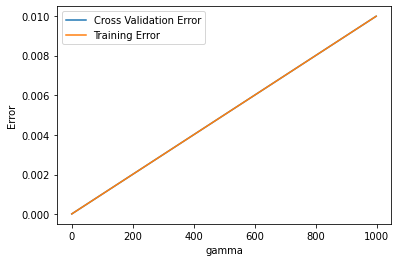

In [18]:
#In one diagram, we graph the two errors versus the gamma parameter

plt.subplot(111)
# error on the cross validation set
plt.plot(np.arange(1,1000)/100000,label='Cross Validation Error')
# error on training set
plt.plot(np.arange(1,1000)/100000,label = 'Training Error')

plt.xlabel("gamma")
plt.ylabel("Error")

plt.legend()


In [13]:
#Do you think that this is a good way of obtaining this optimal parameter?
# yeah it is a good way of oobtaining optimal parameter

In [19]:
#Let us combine the two datasets of training and cross validation into a new training set
x_train = np.concatenate([x_train,x_cv])
y_train = np.concatenate([y_train,y_cv])

In [20]:
#Exercise 3 --- 2 to 3 lines of coding - [2/30]

#i) Using the optimal gamma in the previous exercise, fit an SVM model with an 
#exponential kernel (also called Gaussian)  and C=1, by using the combined new training dataset 
#in the last block.

#ii) Calculate the mean accuracy of the model using x_test and y_test dataset.

#iii) Calculate the total number of support vectors.
#
#----------------------------------
#Write your code bellow

# Gaussian exponential Kernel 
svc_clf = SVC(kernel="linear", gamma=5, C=1)
svc_clf.fit(x_train, y_train)


# mean accuracy
svc_clf.score(x_test, y_test)
mean_accuracy = svc_clf.score(x_test, y_test)
print("mean accuracy"+str(mean_accuracy))

#total number of vectors 
svc_clf.support_vectors_


#----------------------------------


mean accuracy0.96875


array([[-0.29206286, -0.36573115, -0.00410976, ...,  0.7827809 ,
         0.24904021, -0.52605031],
       [ 1.06127902, -1.50705138,  0.11042757, ..., -0.03673228,
         0.8592966 ,  0.25874997],
       [-0.9687338 ,  0.05020097, -0.1186471 , ..., -0.17906817,
         0.12293126,  0.61548454],
       ...,
       [ 0.94850053,  1.2454795 , -0.40499043, ...,  0.02831419,
         0.0779339 , -0.17622389],
       [ 0.83572204,  1.27964305, -1.43582641, ..., -0.13476684,
         0.29135398,  0.47173183],
       [-0.17928437, -1.09691964, -2.23758774, ...,  0.71033986,
         0.36907129, -1.78510668]])

In [21]:
#Exercise 4 --- three to five lines of coding - [3/30]

#i) Use GridSearchCV of sklearn to perform a 5 fold cross validation to tune the following
#parameters: "kernel, gamma and C". The purpose is to find the best parameters that lead 
#to the highest accuracy.
#For the kernel only use gaussian and linear; for gamma and C, you have to choose 
#appropriate ranges.

#ii) print the best tuned parameters
#
#----------------------------------
#Write your code bellow
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)

# printing out the best tuned parameters.
print("The best tuned parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


#----------------------------------


The best tuned parameters are {'C': 1000000.0, 'gamma': 1e-08} with a score of 0.96


In [22]:
#Exercise 5 --- three to five lines of coding - [1/30]

#Using the optimal tuned parameters in the previous exercise calculate the mean accuracy of the model 
#for x_test and y_test dataset.

#
#----------------------------------
#Write your code bellow

clf = SVC(kernel="linear", C=1000000, gamma=1e-08)
clf.fit(x_test, y_test)
clf.score(x_test, y_test)
mean_accuracy = clf.score(x_test, y_test)
print("mean accuracy:"+str(mean_accuracy))


#----------------------------------


mean accuracy:1.0


In [23]:
#Here, we fit a Logit model with lbfgs solver and an l2 penalty using new training dataset, and 
#calculate the accuracy of the model using X_test and y_test dataset

#
#----------------------------------

from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression(solver = 'lbfgs',penalty='l2')
clf_logit.fit(x_train, y_train)
#y_pred_log=clf_logit.predict(X_test)
accuracy =clf_logit.score(x_test,y_test)
# accuracy of the model using x_test and y_test
# clf_logit.fit(x_test, y_test)
print("accuracy of the model"+str(accuracy))
#----------------------------------


accuracy of the model0.9791666666666666
